# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data

In [2]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [5]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Normalize data

PCA identifies new axes (principal components) that maximize variance. If you don't standardize, variables with larger variances will dominate the first principal component, making it harder to interpret the relationships between variables.

In [6]:
# Create Dataframe
X_train_df = pd.DataFrame(data=X_train, columns=feature_names)
X_train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


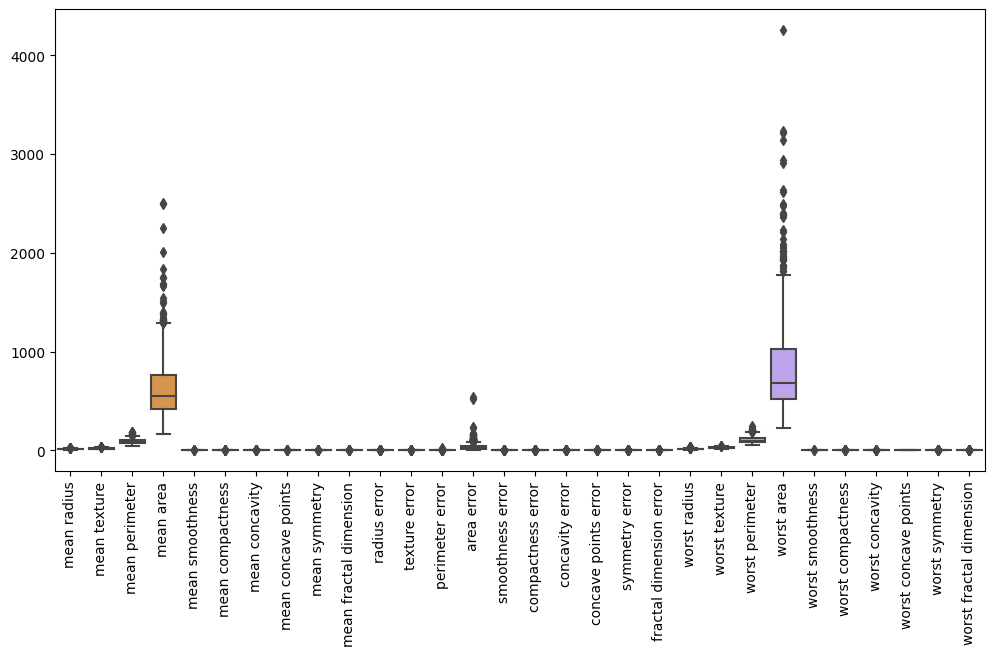

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90);

In [8]:
# Standardize Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Standardize dataframe
X_train_df = pd.DataFrame(data=X_train, columns=feature_names)
X_train_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


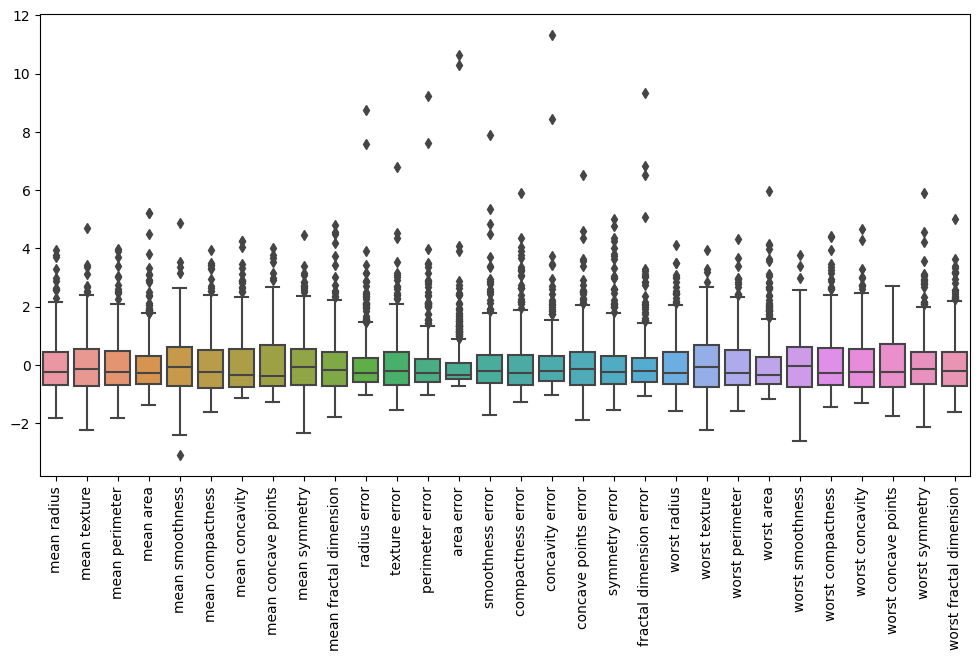

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90);

# Scree plot

In [11]:
pca = PCA()
pca.fit(X_train);

In [12]:
var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = var_ratio.cumsum()
PC_number = np.arange(1, pca.n_components_ + 1)

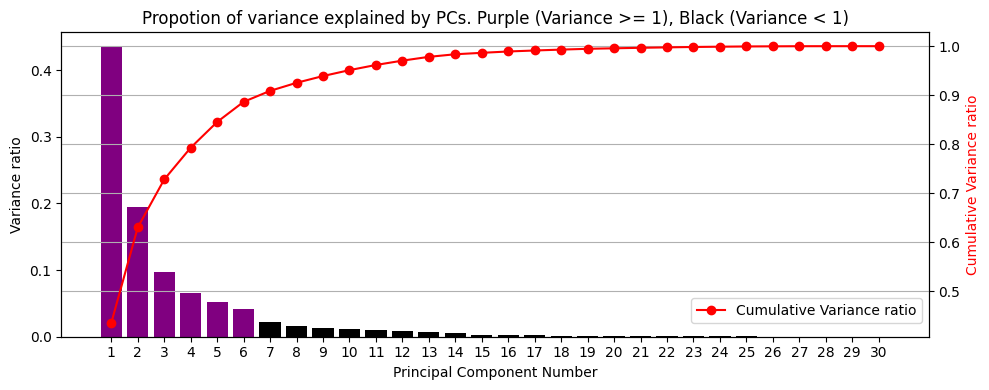

In [13]:
plt.figure(figsize=(10,4))

colors = np.where(pca.explained_variance_ >= 1, "purple", "black")

plt.bar(PC_number, var_ratio, color=colors, label="Variance ratio")
plt.xlabel("Principal Component Number")
plt.ylabel("Variance ratio")

plt.twinx()

plt.plot(PC_number, cumulative_var_ratio, color="red", label="Cumulative Variance ratio", marker="o")
plt.ylabel("Cumulative Variance ratio", color="red")

plt.legend(loc="upper right", bbox_to_anchor=(1, 0.15))
plt.xticks(PC_number)
plt.grid()
plt.title("Propotion of variance explained by PCs. Purple (Variance >= 1), Black (Variance < 1)")
plt.tight_layout()

According to Kaiser’s rule, all the components with eigenvalues (variance) greater than 1 should be kept for statistical inference. The reasoning behind Kaiser’s rule is that any principal component retained should explain the variance at least as much as an original standardized variable.

By Kaiser’s rule, Recommended number of principal components are 6 which explain about 90% of variance.

We will use 2 principal components explaining 63% variance in order to show the biplot.

# Apply PCA

In [14]:
# Truncating the number of components:
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
X_train_pca.shape, X_test_pca.shape

((455, 2), (114, 2))

# Biplot

In [16]:
# Projected data on PC1 and PC2
PC1_score = X_train_pca[:, 0]
PC2_score = X_train_pca[:, 1]

In [17]:
# First 2 Principal Components (PC1 and PC2), which are eigenvectors of covariance matrix, in original 30 feature dimensions
components = pca.components_
components.shape

(2, 30)

Each row represents PC vector and each column represents loading for feature. Loadings are weights that show the association between the original variables and principal components. Maximum loading of feature for a PC unit eigenvector is 1 which shows that PC is along that feature axis.

In [18]:
df = pd.DataFrame(data=PC1_score, columns=["PC1"])
df["PC2"] = PC2_score
df["target"] = target_names[y_train]
df

,PC1,PC2,target
0,4.244903,9.131428,benign
1,9.053755,0.475310,malignant
2,-2.275374,3.278471,benign
3,-2.510453,0.743743,benign
4,-2.302848,2.665155,benign
...,...,...,...
450,-0.368252,7.231415,benign
451,-0.686605,1.781220,benign
452,-4.500654,-3.067808,benign
453,0.728285,0.426287,malignant


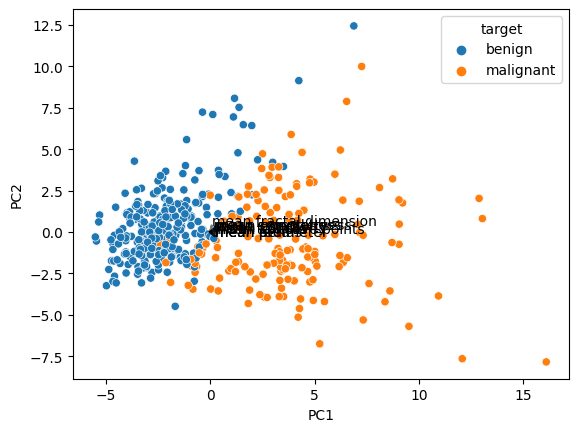

In [19]:
sns.scatterplot(data=df, x="PC1", y="PC2", hue="target")
for i, feature in enumerate(feature_names[:10]):
    plt.arrow(0, 0, components[0, i], components[1, i], alpha=0.5, head_width=0.01, head_length=0.01, linewidth=1.5)
    plt.text(components[0, i] * 1.1, components[1,i] * 1.1, feature)

As seen from previous boxplot of standardized data, the max range of feature variables is 12. Projections on the principal components will have max range of 16. The loadings which are in the range of [0,1] are very hard to see in this case. So we need to scale the projections of each feature variable by its range. This will make projections to lie in the range of [0,1].

In [20]:
# Scaling the data
PC1_score_scaled = PC1_score / (PC1_score.max() - PC1_score.min())
PC2_score_scaled = PC2_score / (PC2_score.max() - PC2_score.min())

In [21]:
df["PC1_scaled"] = PC1_score_scaled
df["PC2_scaled"] = PC2_score_scaled
df

,PC1,PC2,target,PC1_scaled,PC2_scaled
0,4.244903,9.131428,benign,0.196624,0.450517
1,9.053755,0.475310,malignant,0.419369,0.023450
2,-2.275374,3.278471,benign,-0.105395,0.161750
3,-2.510453,0.743743,benign,-0.116284,0.036694
4,-2.302848,2.665155,benign,-0.106668,0.131491
...,...,...,...,...,...
450,-0.368252,7.231415,benign,-0.017057,0.356776
451,-0.686605,1.781220,benign,-0.031803,0.087880
452,-4.500654,-3.067808,benign,-0.208470,-0.151356
453,0.728285,0.426287,malignant,0.033734,0.021032


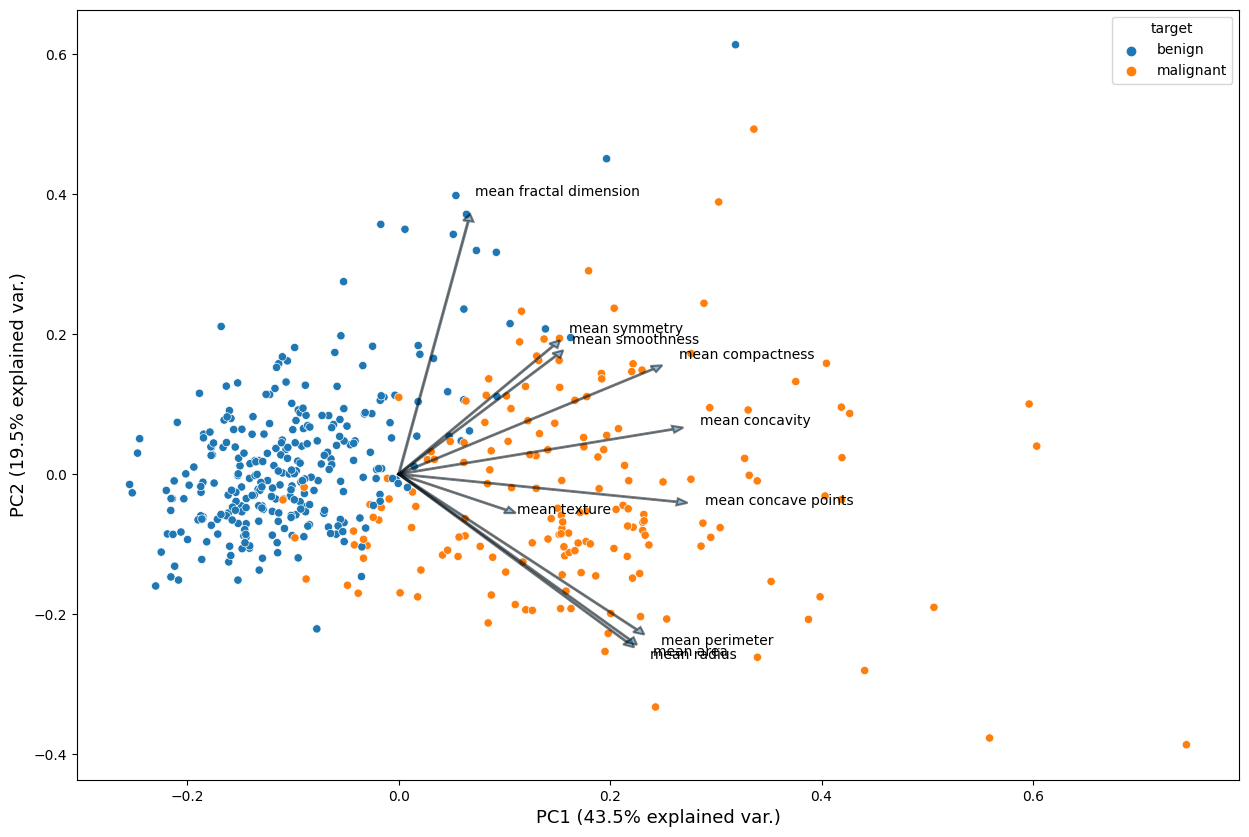

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="PC1_scaled", y="PC2_scaled", hue="target")
for i, feature in enumerate(feature_names[:10]):
    plt.arrow(0, 0, components[0, i], components[1, i], alpha=0.5, head_width=0.01, head_length=0.01, linewidth=1.5)
    plt.text(components[0, i] * 1.1, components[1,i] * 1.1, feature)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% explained var.)", fontsize=13)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% explained var.)", fontsize=13);

The feature vecotors of only mean measurements are shown for easy plot interpretability. Feature vectors of worst measurements are somewhat similar.

**Observations**

- Notice how well PCA separated the target classes while representing 30-dimensional data in only 2 dimensions (PC1 and PC2).
- Keep in mind that in this plot, 30-dimensional data is projected onto the 2D plane of the first two principal components (PC1 and PC2) explaining 63% of the variance.
- With 63% of the variance explained by the 2D plane, the classes are well separated, allowing us to feed this transformed data into a classification model, which can be trained easily by creating a linear decision boundary between the classes.
- For even greater accuracy at the cost of complexity, you can project the 30-dimensional data into a 3D space using the first three principal components, which explain about 72% of the variance. You can then train your model to create a separating plane between data points of the two classes in this 3D space.
- Principal components are designed to be uncorrelated with each other (orthogonal).
- PC1 does not have a negative correlation with any of the original features.
- Symmetry and smoothness measures are highly correlated features. As expected, radius, area, and perimeter measures are also highly correlated features. This indicates that one feature from the group of highly correlated features is useful, while the others are redundant.
- PC1 is highly correlated with concavity, concave points, compactness, and area/radius/perimeter measures. A high PC1 value means high values of these original features.
- PC2 is highly positively correlated with fractal dimension and highly negatively correlated with radius/area/perimeter. A high PC2 value means a large fractal dimension but a small area.


# Training a classification model

In [23]:
X_train_pca.shape, X_train.shape

((455, 2), (455, 30))

In [24]:
# Using pca data of two features (PC1 and PC2)
clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train)
# vs using original data of 30 features
clf = LogisticRegression()
clf.fit(X_train, y_train);

In [25]:
# Predict
y_pred_pca = clf_pca.predict(X_test_pca)
y_pred = clf.predict(X_test)

# Measure accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy when using original data: {accuracy:.2f}")
print(f"Accuracy when using PCA with two PCs: {accuracy_pca:.2f}")

Accuracy when using original data: 0.97
Accuracy when using PCA with two PCs: 0.99


Using PCA, we have small number of features to train as well as high accuracy.

# Plotting the decision bounday

**Simple Plot:**

Text(0.5, 1.0, 'Decision Boundary')

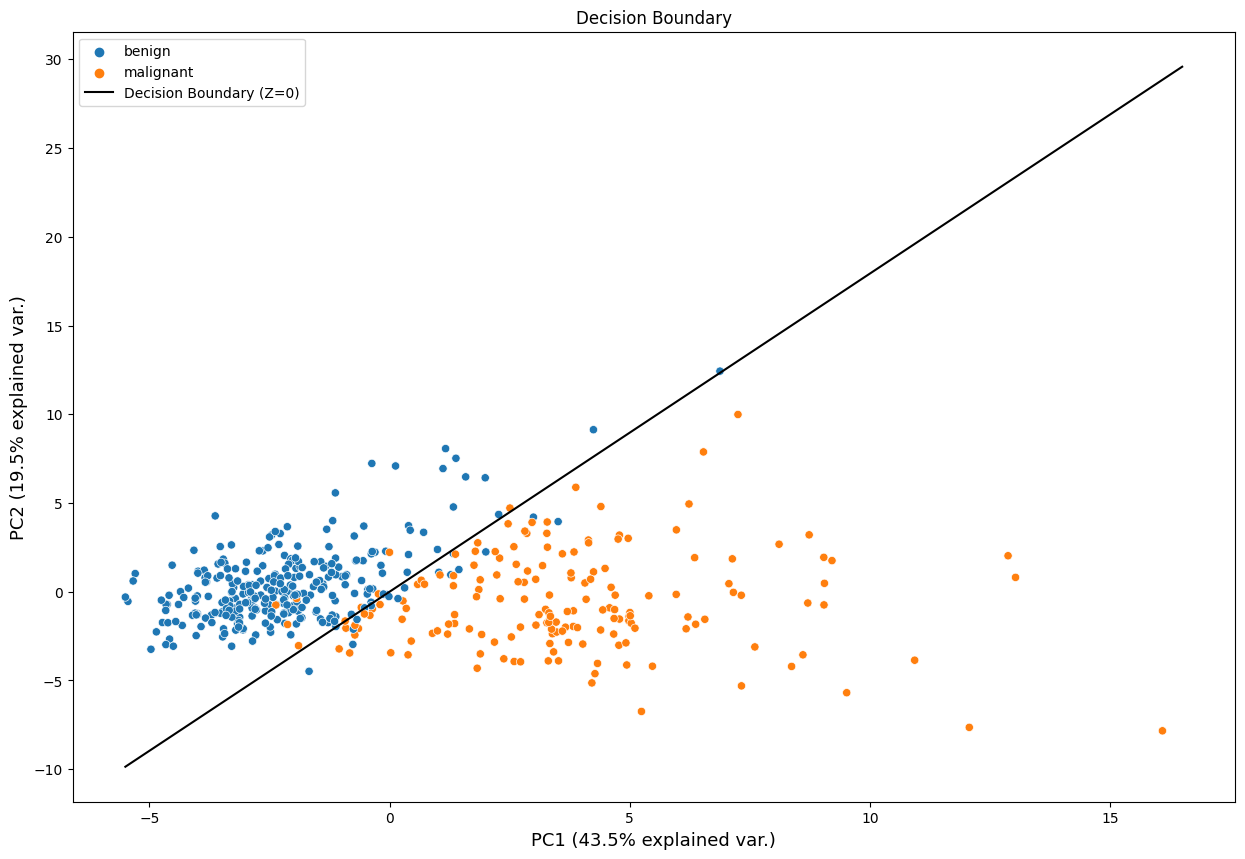

In [26]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="target")

w1, w2 = clf_pca.coef_[0]
x1 = np.arange(X_train_pca[:, 0].min(), X_train_pca[:, 0].max() + 1)
x2 = (-x1 * w1)/w2
plt.plot(x1, x2, color="black", label="Decision Boundary (Z=0)")
plt.legend()

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% explained var.)", fontsize=13)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% explained var.)", fontsize=13)
plt.title("Decision Boundary")

**More Detailed Plot:**

In [27]:
# Finding predicted probability of each data point in grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()] # concatenate along second axis, creating array with 2 columns indicating x and y cordinates in grid
probs = clf_pca.predict_proba(grid)[:, 1] # getting predicted probabilities for positive class
probs = probs.reshape(xx.shape)

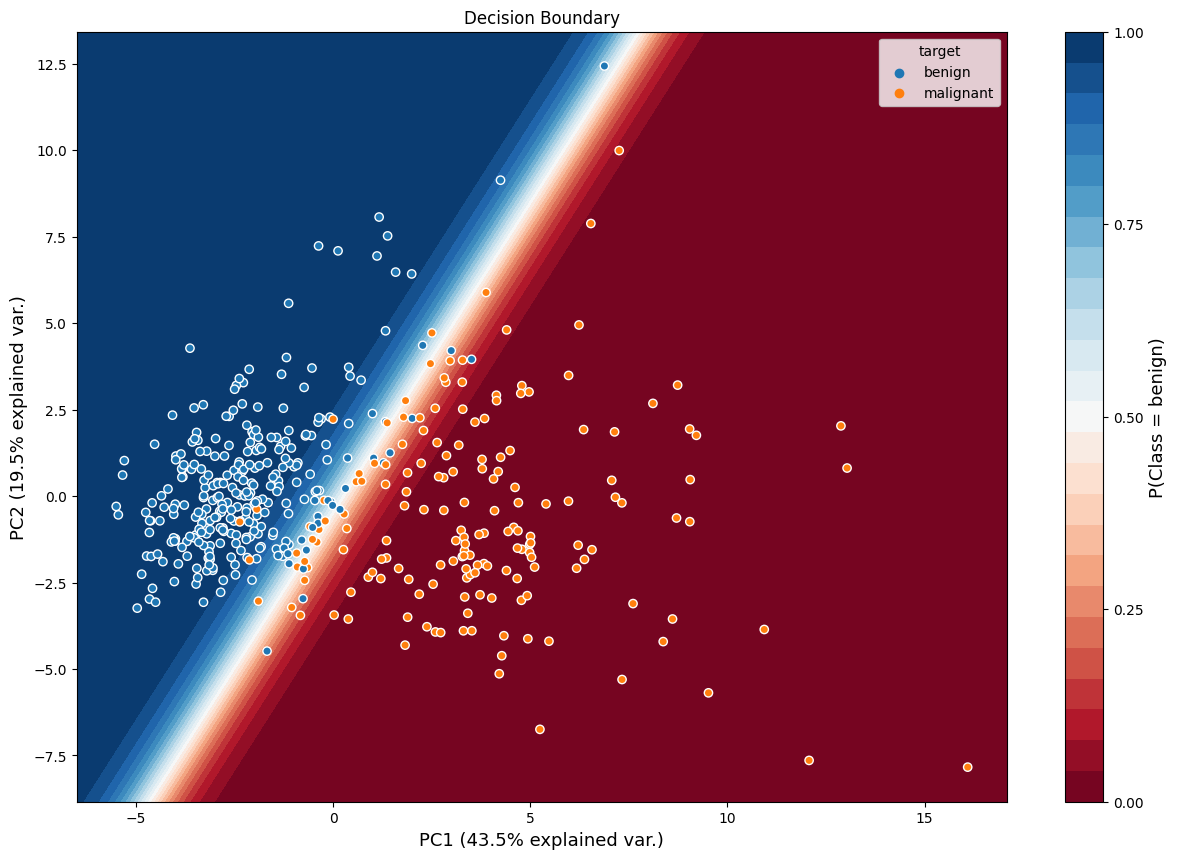

In [28]:
# Plot the decision boundary
plt.figure(figsize=(15, 10))

contour = plt.contourf(xx, yy, probs, 25, cmap="RdBu")
ax_c = plt.colorbar(contour)
ax_c.set_label("P(Class = benign)", fontsize=13)
ax_c.set_ticks([0, .25, .5, .75, 1])

sns.scatterplot(data=df, x="PC1", y="PC2", hue="target",
           edgecolor="white", linewidth=1)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% explained var.)", fontsize=13)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% explained var.)", fontsize=13)
plt.title("Decision Boundary");

Decision boundary is shown by white line having same 50% probability of being benign and malignant.

# About Logistic Regression Model

The output $Z$ of logistic regression model is:
$$Z = w_1 \cdot PC1 + w_2 \cdot PC2$$
Where $w_1$ and $w_2$ are the coefficients (weights) learned by the logistic regression model, and $PC1$ and $PC2$ are the values of the first and second principal components.

The probability $P(y=1)$ of a data point belonging to class 1 (e.g., benign) is computed using the sigmoid function:

$$P(y=1) = sigmoid(Z) = \frac{1}{1 + e^{-Z}}$$

The decision bounday with 50% probability is found by $Z=0$, that is:
$$w_1 \cdot PC1 + w_2 \cdot PC2 = 0$$

The logistic regression model is trained to find the values of $w_1$ and $w_2$ that minimize a loss function. The specific form of the loss function used in logistic regression is often the binary cross-entropy (log loss) function, defined as:

$$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Where:
- $L$ is the binary cross-entropy loss
- $y$ is the true binary label (0 or 1)
- $\hat{y}$ is the predicted probability of the data point belonging to class 1
- $N$ is the number of data points in the training dataset

The goal of training the logistic regression model is to find the values of $w_1$ and $w_2$ that minimize this loss function, effectively making the predicted probabilities $\hat{y}$ as close as possible to the true labels for the given data points.

The training algorithm for logistic regression involves minimizing the binary cross-entropy (log loss) loss function:

The gradient step in logistic regression updates the weights $w_1$ and $w_2$ using the gradients of the loss with respect to these weights:
$$w_1 \leftarrow w_1 - \alpha \frac{\partial L}{\partial w_1}$$
$$w_2 \leftarrow w_2 - \alpha \frac{\partial L}{\partial w_2}$$

To compute the gradients $\frac{\partial L}{\partial w_1}$ and $\frac{\partial L}{\partial w_2}$ using the chain rule, we first calculate $\frac{\partial L}{\partial Z}$ (the gradient of the loss with respect to the linear combination $Z$), and then $\frac{\partial Z}{\partial w_1}$ and $\frac{\partial Z}{\partial w_2}$.

$$\frac{\partial L}{\partial Z} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)$$
$$\frac{\partial Z}{\partial w_1} = PC1_i$$
$$\frac{\partial Z}{\partial w_2} = PC2_i$$

$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial w_1} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot PC1_i$$
$$\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial w_2} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot PC2_i$$
